# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [1353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1354]:
df = pd.read_csv("train.csv")

In [1355]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1357]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check Duplicated

In [1358]:
df.duplicated().sum()

np.int64(0)

### Check Null Values

In [1359]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Analysis

### How many passengers survived,how many died ?

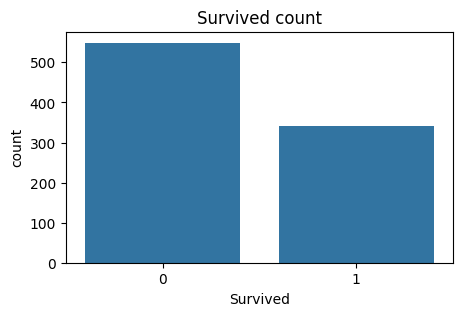

In [1360]:
fig,ax = plt.subplots(figsize=(5,3))
sns.countplot(data=df,x='Survived')
plt.title('Survived count')
plt.show()

### How many male and female passengers survived ?

In [1361]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [1362]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


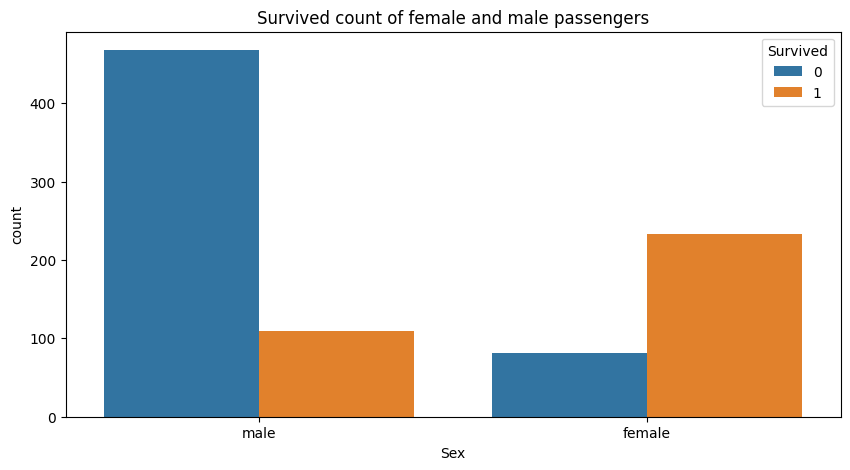

In [1363]:
fig,ax = plt.subplots(figsize=(10,5))
df['Survived'] = df['Survived'].astype(str)
sns.countplot(data=df,x='Sex',hue='Survived')
plt.title('Survived count of female and male passengers')
plt.show()

### How many pclass effects  survived ?

In [1364]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


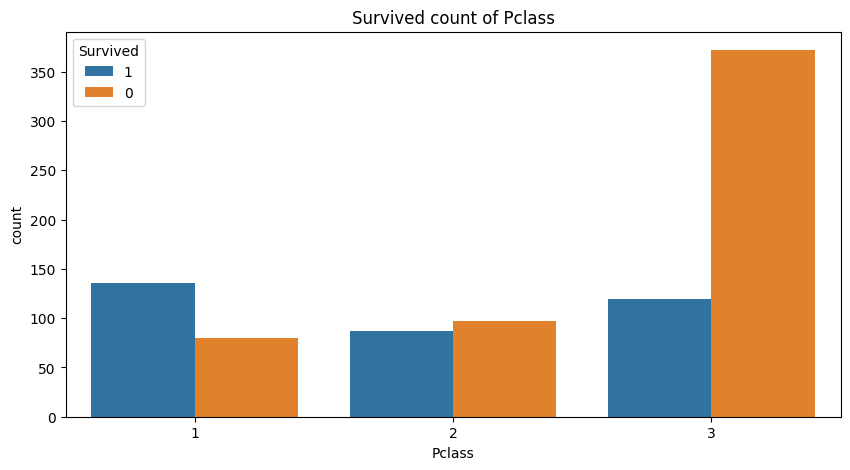

In [1365]:
fig,ax = plt.subplots(figsize=(10,5))
# df['Survived'] = df['Survived'].astype(str)
sns.countplot(data=df,x='Pclass',hue='Survived')
plt.title('Survived count of Pclass')
plt.show()

### How many Age effects  survived ?

In [1366]:
pd.crosstab(df['Age'],df['Survived'])

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


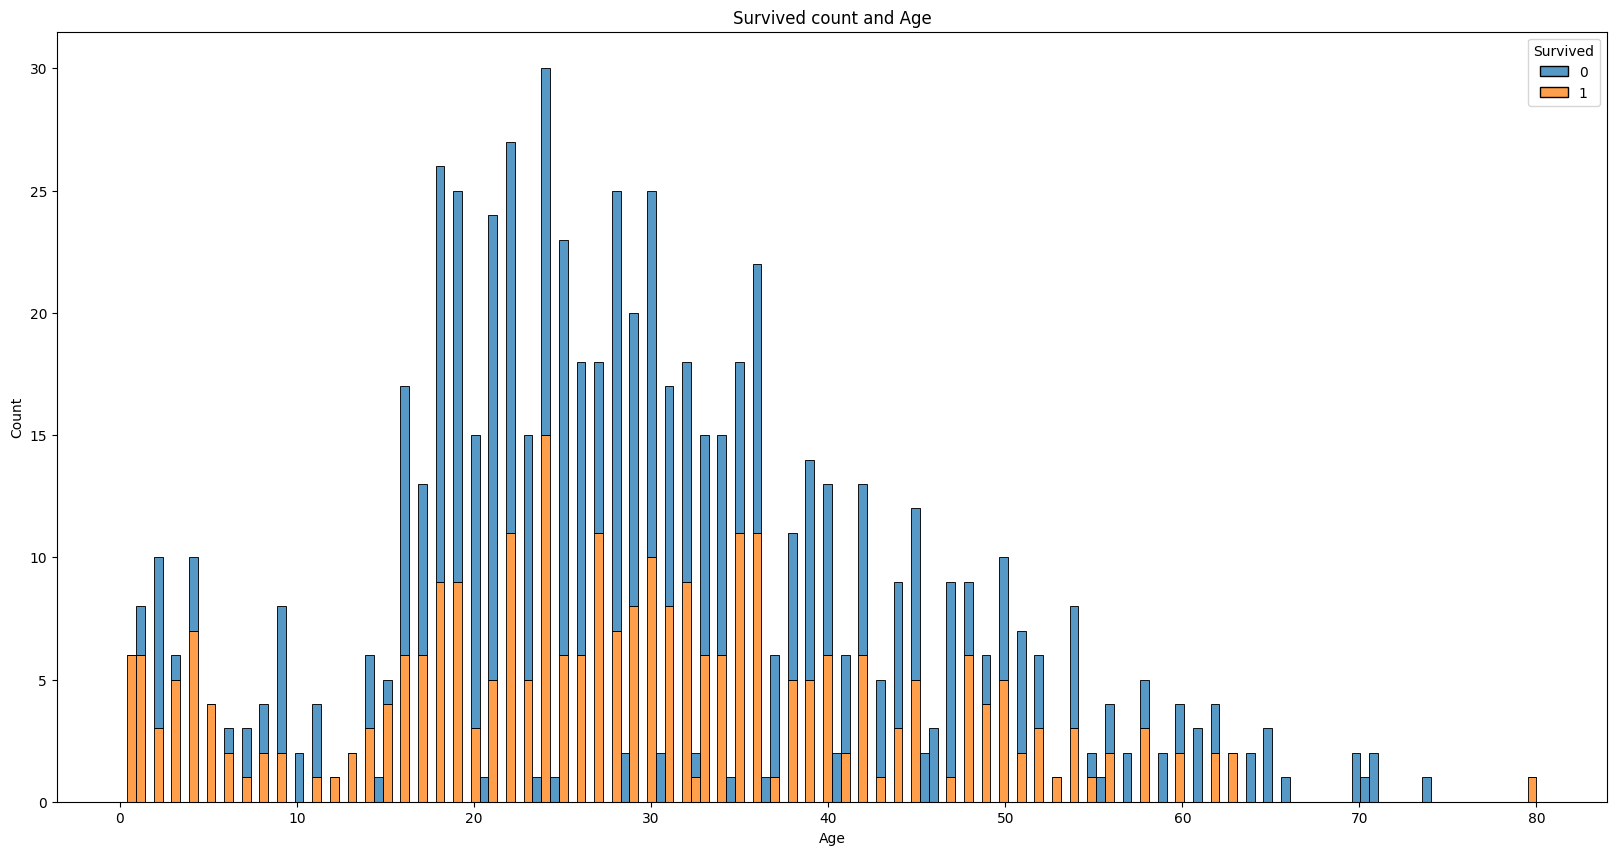

In [1367]:
fig,ax = plt.subplots(figsize=(20,10))
# df['Survived'] = df['Survived'].astype(str)
sns.histplot(data=df,x='Age',hue='Survived',bins=160,multiple='stack',ax=ax,color=['green','red'])
plt.title('Survived count and Age')
plt.show()

<Axes: title={'center': 'unSurvived passengers of ages'}, xlabel='Age', ylabel='Count'>

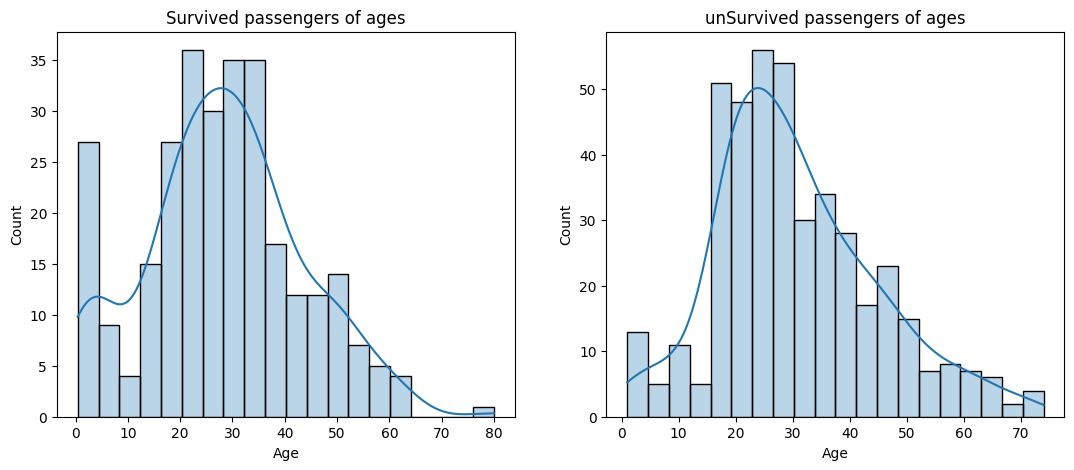

In [1368]:
#survived passengers
survived_df = df[df['Survived'] =='1']
#unsurvived passengers
unsurvived_df = df[df['Survived'] =='0']
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('Survived passengers of ages')
sns.histplot(data=survived_df,x='Age',kde=True,bins=20,alpha=0.3)
plt.subplot(1,2,2)
plt.title('unSurvived passengers of ages')
sns.histplot(data=unsurvived_df,x='Age',kde=True,bins=20,alpha=0.3)



In [1369]:
infant_passengers = df[df['Age'] <= 5]
infant_passengers['Survived'].value_counts(normalize=True)

Survived
1    0.704545
0    0.295455
Name: proportion, dtype: float64

### How many Family size   survived ?

In [1370]:
pd.crosstab(df['Parch'],df['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


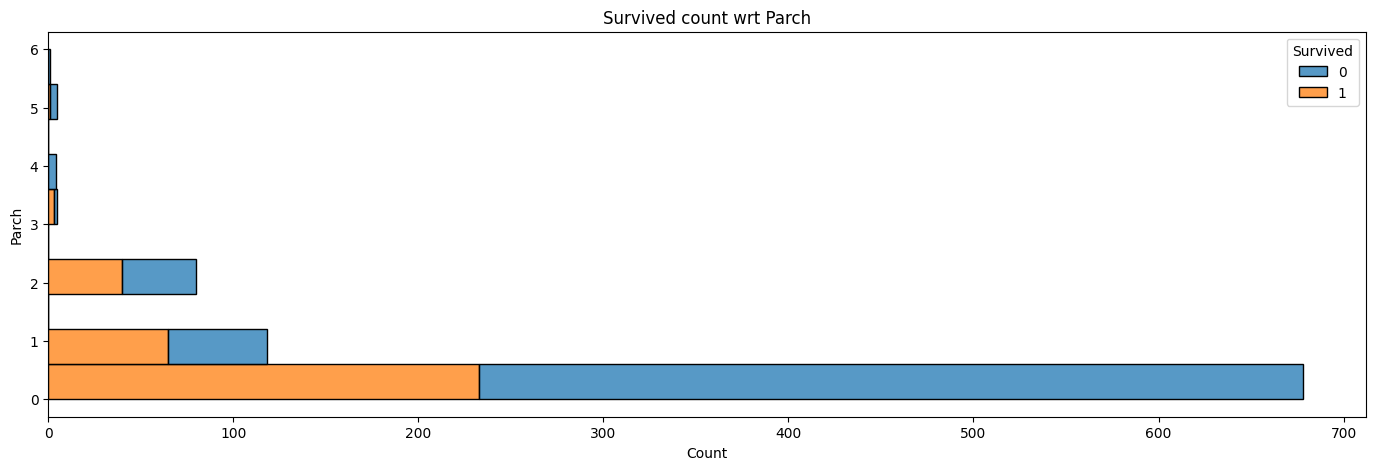

In [1371]:
fig,ax = plt.subplots(figsize=(17,5))
sns.histplot(data=df,y='Parch',bins=10,multiple='stack',ax=ax,hue='Survived')
plt.title('Survived count wrt Parch')
plt.show()

In [1372]:
pd.crosstab(df['SibSp'],df['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


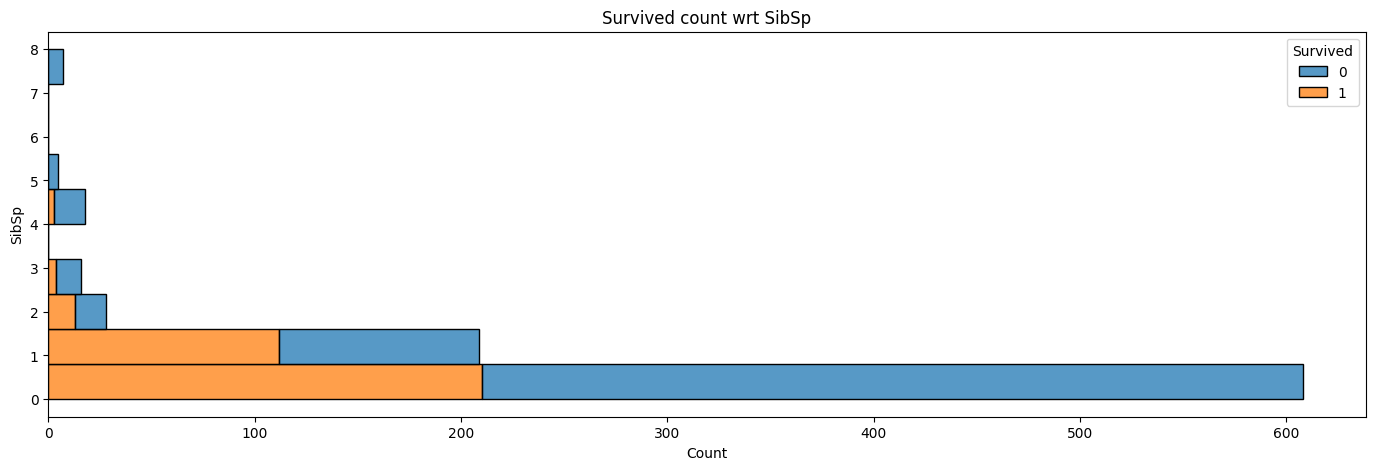

In [1373]:
fig,ax = plt.subplots(figsize=(17,5))
sns.histplot(data=df,y='SibSp',bins=10,multiple='stack',ax=ax,hue='Survived')
plt.title('Survived count wrt SibSp')
plt.show()

### How many Embarked effects  survived ?

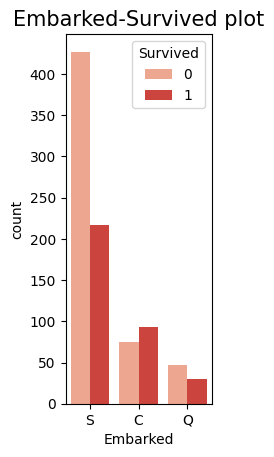

In [1374]:
plt.subplot(1,3,3)
plt.title('Embarked-Survived plot',size=15)
plot = sns.countplot(data = df,x = 'Embarked',hue='Survived',palette='Reds')

### How many Fare effects  survived ?

<Axes: title={'center': 'unSurvived passengers of ages'}, xlabel='Fare', ylabel='Count'>

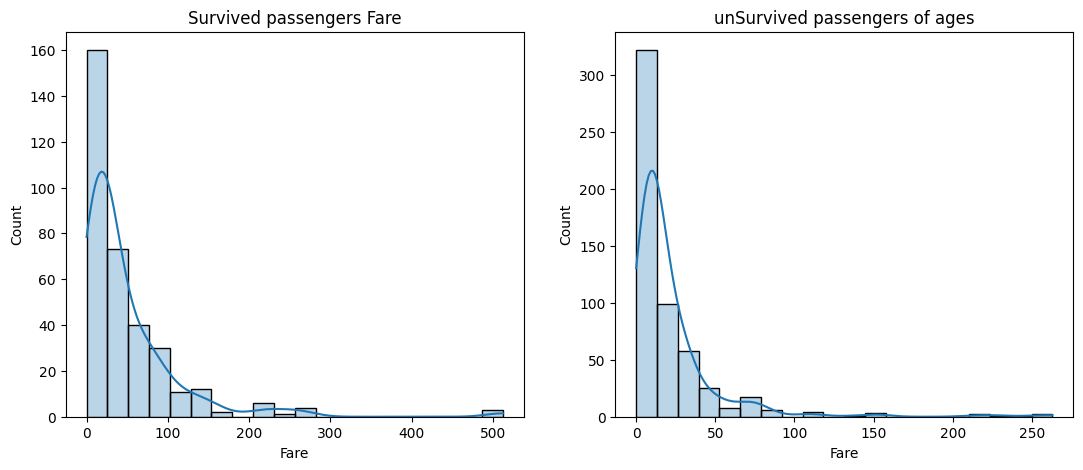

In [1375]:
#survived passengers
survived_df = df[df['Survived'] =='1']
#unsurvived passengers
unsurvived_df = df[df['Survived'] =='0']
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('Survived passengers Fare')
sns.histplot(data=survived_df,x='Fare',kde=True,bins=20,alpha=0.3)
plt.subplot(1,2,2)
plt.title('unSurvived passengers of ages')
sns.histplot(data=unsurvived_df,x='Fare',kde=True,bins=20,alpha=0.3)

### Feature Selection

In [1376]:
df.drop(df.columns[[0,3,8,10]],axis=1,inplace=True)

In [1377]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Feature Engineering 

### Fill out the missing values

In [1378]:
mean = df['Age'].mean()
std = df['Age'].std()
nulls = df['Age'].isnull().sum()
ransom_age = np.random.randint(mean - std ,mean + std,size = nulls)
df['Age'] [df['Age'].isna()] = ransom_age
df['Age'] = df['Age'].astype(int)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)




C:\Users\ganesh10\AppData\Local\Temp\ipykernel_8540\1475340075.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Age'] [df['Age'].isna()] = ransom_age
C:\Users\ganesh10\AppData\Local\Temp\ipykernel_8540\1475340075.py:5: SettingWithCopy

In [1379]:
df['Age'].isnull().sum()

np.int64(0)

In [1380]:
df['Embarked'].isnull().sum()

np.int64(0)

In [1381]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,27,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


### Data Encoding

In [1382]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [1383]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [1384]:
categorical_cols = ['Pclass','Embarked']
df = pd.get_dummies(df,columns=categorical_cols,drop_first=True)

In [1385]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_1,Embarked_2
0,0,1,22,1,0,7.2500,False,True,False,True
1,1,0,38,1,0,71.2833,False,False,False,False
2,1,0,26,0,0,7.9250,False,True,False,True
3,1,0,35,1,0,53.1000,False,False,False,True
4,0,1,35,0,0,8.0500,False,True,False,True


###  Data Scaling

<Axes: >

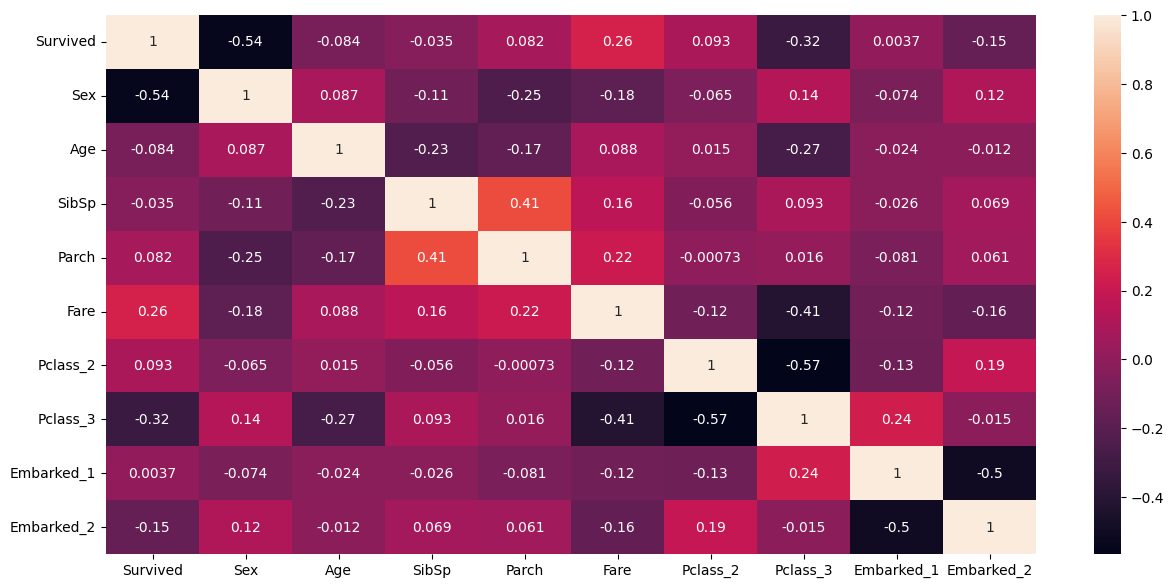

In [1386]:
corr = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True,annot_kws={'size':10})

In [1387]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
imputer = scaler.fit(df.iloc[:,1:])
df.iloc[:,1:] = imputer.transform(df.iloc[:,1:])

C:\Users\ganesh10\AppData\Local\Temp\ipykernel_8540\3097999953.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.275  0.475  0.325  0.4375 0.4375 0.375  0.675  0.025  0.3375 0.175
 0.05   0.725  0.25   0.4875 0.175  0.6875 0.025  0.25   0.3875 0.275
 0.4375 0.425  0.1875 0.35   0.1    0.475  0.3625 0.2375 0.475  0.5
 0.5    0.3875 0.3625 0.825  0.35   0.525  0.375  0.2625 0.225  0.175
 0.5    0.3375 0.3125 0.0375 0.2375 0.525  0.3625 0.425  0.225  0.225
 0.0875 0.2625 0.6125 0.3625 0.8125 0.35   0.2625 0.35   0.0625 0.1375
 0.275  0.475  0.5625 0.05   0.4875 0.2125 0.3625 0.2375 0.2125 0.325
 0.4    0.2    0.2625 0.325  0.4    0.3125 0.5    0.35   0.     0.375
 0.275  0.3625 0.5    0.35   0.2125 0.4125 0.2    0.5125 0.2875 0.3
 0.3625 0.25   0.575  0.325  0.7375 0.4    0.8875 0.2875 0.425  0.425
 0.35   0.2375 0.2625 0.4125 0.4625 0.35   0.2625 0.425  0.475  0.25
 0.5875 0.175  0.275  0.25   0.2125 0.2625 0.87

In [1388]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_1,Embarked_2
0,0,1,0.2750,0.125,0.000000,0.014151,0.0,1.0,0.0,1.0
1,1,0,0.4750,0.125,0.000000,0.139136,0.0,0.0,0.0,0.0
2,1,0,0.3250,0.000,0.000000,0.015469,0.0,1.0,0.0,1.0
3,1,0,0.4375,0.125,0.000000,0.103644,0.0,0.0,0.0,1.0
4,0,1,0.4375,0.000,0.000000,0.015713,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,1,0.3375,0.000,0.000000,0.025374,1.0,0.0,0.0,1.0
887,1,0,0.2375,0.000,0.000000,0.058556,0.0,0.0,0.0,1.0
888,0,0,0.3375,0.125,0.333333,0.045771,0.0,1.0,0.0,1.0
889,1,1,0.3250,0.000,0.000000,0.058556,0.0,0.0,0.0,0.0


### Getting the inputs and output

In [1389]:
x = df.iloc[:,1:].values

In [1390]:
x.shape

(891, 9)

In [1391]:
y = df.iloc[:,1].values

In [1392]:
y.shape

(891,)

### Creating the Training Set and the Test Set

In [1393]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

## Part 2 - Building and training the model

### Building the model

In [1394]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
params = [{'C':[0.001,0.01,0.1,1,10,100,1000,10000,100000],'penalty':['l2','l1']}]
grid_search = GridSearchCV(lr,params,cv=5)

### Training the model

In [1395]:
grid_search.fit(x_train,y_train)

C:\Users\ganesh10\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ganesh10\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ganesh10\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ganesh10\AppData\Roaming\Python\Pyth

,estimator,LogisticRegression()
,param_grid,"[{'C': [0.001, 0.01, ...], 'penalty': ['l2', 'l1']}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [1396]:
grid_search.best_estimator_

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [1397]:
y_pred_test = grid_search.predict(x_test)
y_pred_train = grid_search.predict(x_train)

In [1398]:
y_pred_test

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1])

### Inference

Making the predictions of the data points in the test set

## Part 3: Evaluating the model

### score

In [1399]:
grid_search.score(x_train,y_train)

1.0

In [1400]:
grid_search.score(x_test,y_test)

1.0

### Accuracy

In [1401]:
from sklearn.metrics import accuracy_score
accuracy_score_test = accuracy_score(y_test,y_pred_test)
accuracy_score_train = accuracy_score(y_train,y_pred_train)

In [1402]:
accuracy_score_test

1.0

In [1403]:
accuracy_score_train

1.0

### Confusion Matrix

### Classfication Report